Data Scientist at an e-commerce store
Predict User Actions on the site
Direct Monetary Impact
    predict bounce
    discover areas of the site that are weak
    Mobile/user friendliness
    Make Data Driven Decisions
    Use Science to improve user experience

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.read_csv(r'/Users/prof/Documents/machine_learning_examples/ann_logistic_extra/ecommerce_data.csv')
data

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2
...,...,...,...,...,...,...
495,1,3,0.731594,0,0,2
496,0,0,6.368775,1,3,0
497,0,0,0.172853,1,3,0
498,1,0,0.209964,0,3,0


is_mobile - is user visiting site on a mobile device
n_products_viewed - number of products user viewed during their session
visit_duration - Length of time in minutes user was on the site
is_returning_Visitor - 0 if new user, 1 if returning user
time_of_day - encoded, 0 = 12am to 6am, 1 = 6 am 12pm, 2 = 12pm to 6pm, 3 = 6pm to 12am
user_action - bounce, add_to_cart, begin_checkout, finish_checkout

# Feedforward Example one subject two inputs

In [3]:
X = [[0,3.5],[1,2],[1,0.5]] #Data
Y = [1,1,0] #Actual Response
W = [[0.5,0.1,-0.3],[0.7, -0.3, 0.2]] #Weights
Wt = np.transpose(W)
b = [0.4, 0.1, 0]
v = [0.8, 0.1, -0.1]
c = 0.2

In [4]:
activation_Z1 = np.dot(Wt,X[0])
activation_Z2 = np.dot(Wt,X[1])
activation_Z3 = np.dot(Wt,X[2])

In [5]:
a1 = activation_Z1[0]+b[0]
a2 = activation_Z1[1]+b[1]
a3 = activation_Z1[2]+b[2]

In [6]:
def tanh(value):
    z = (math.exp(value) - math.exp(-value)) / (math.exp(value) + math.exp(-value))
    return z

In [7]:
def sigm(value1, value2, value3):
    zvalues = [value1, value2, value3]
    inner = np.dot([value1,value1,value1], v) + c
    sigmoid = 1 / (1+math.exp(-inner))
    return sigmoid

In [8]:
z1 = tanh(a1)
z2 = tanh(a2)
z3 = tanh(a3)

In [9]:
sigm(z1,z2,z3)

0.7300082255276845

# Feedforward Multi Samples

In [17]:
def Hidden_layer(variables, weights): 
    z_vars = []
    for i in range(3):
        z_init = []
        for j in range(3):
            globals()['activate_'+str(i)+str(j)] = np.dot(X[i],Wt[j])+b[j]
            globals()['z'+str(i)+str(j)] = ((math.exp(globals()['activate_'+str(i)+str(j)]))- math.exp(-globals()['activate_'+str(i)+str(j)]))/((math.exp(globals()['activate_'+str(i)+str(j)])) + math.exp(-globals()['activate_'+str(i)+str(j)]))
            
            z_init.append(globals()['z'+str(i)+str(j)])
        z_vars.append(z_init)
    return z_vars

In [18]:
def predict_y(z_val, v_val, c_val):
    y_all = []
    for i in range(3):
        y = sigm(z_val[i], v_val, c_val)
        y_all.append(y)
    return y_all

In [19]:
def sigm(inputvals, v_vals, c_val):
    inner = np.dot(inputvals, v_vals) + c_val
    sigmoid = 1 / (1+math.exp(-inner))
    return sigmoid

In [20]:
z_factors = Hidden_layer(X,W)
z_factors

[[0.9933303853851733, -0.7397830512740043, 0.6043677771171636],
 [0.9800963962661914, -0.37994896225522484, 0.0996679946249559],
 [0.8482836399575129, 0.049958374957880004, -0.19737532022490403]]

In [21]:
predict_y(z_factors, v, c)

[0.7027127220576921, 0.7183143232075594, 0.7116395517123809]

# Softmax multi output nodes

In [10]:
V2 = [[0,0.8],[0.4,0.5],[0.5, 0.4]]
V2t = np.transpose(V2)
C2 = [0.3, 0.5]

In [11]:
def softmax(input1, input2):
    softmax1 = math.exp(input1) / ((math.exp(input1))+(math.exp(input2)))
    softmax2 = 1 - softmax1
    return softmax1, softmax2

In [12]:
def softmax_multi_step1(z_vals, v_vals, c_vals):
    y_multi_final = []
    for i in range(3):
        y_multi_init = []
        for j in range(2):
            y_multi = np.dot(z_vals[i], V2t[j])+ C2[j]
            y_test = sigm(z_vals[i], v_vals[j], c_vals[j])
            y_multi_init.append(y_multi)
        y_multi_final.append(y_multi_init)
    return y_multi_final

In [24]:
softmax_init = softmax_multi_step1(z_factors, V2t, C2)

In [25]:
for i in range(3):
    one, two = softmax(softmax_init[i][0],softmax_init[i][1])
    print(one)
    print(two)

0.2972872779423079
0.7027127220576921
0.2816856767924406
0.7183143232075594
0.288360448287619
0.711639551712381


# Neural Network Feedforward Example

In the above examples, I looped over a set number of responses or records to build out a Neural network. What happens when there are more responses than are possible to manually code for? How can we leverage matricies to accomplish the same feat with a bigger dataset?

In [27]:
import matplotlib.pyplot as plt

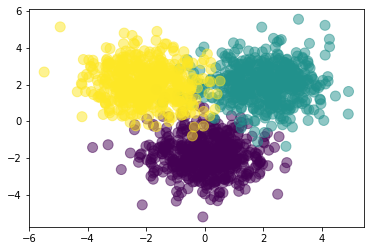

In [129]:
#Generating the random data, three inputs of the length 500, they are plotted below
N = 500
x1 = np.random.randn(N, 2) + np.array([0,-2])
x2 = np.random.randn(N, 2) + np.array([2,2])
x3 = np.random.randn(N, 2) + np.array([-2,2])

x = np.vstack([x1, x2, x3])

y = np.array([0]*N + [1]*N + [2]*N)

plt.scatter(x[:,0], x[:,1],c = y, s = 100, alpha = 0.5)
plt.show()

In [130]:
# Setting up the matricies for use in the Feed Forwrad model, There is only one hidden layer in this model
D = 2
M = 3
K = 3

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [131]:
# In the feed forward model the first step is to use the sigmoid function to find the hidden layer activation value
# Next, use the activation value (Z) multiplied by the hidden layer weights to find the activation value of the output
# Then calculate Y using the softmax method
def ff_sigm(x, W1, b1, W2, b2):
    a = x.dot(W1) + b1
    Z = 1 / (1 + np.exp(-a))
    A = Z.dot(W2) + b2
    exponA = np.exp(A)
    Y = exponA / exponA.sum(axis = 1, keepdims = True)
    return Y

In [132]:
ff_y = ff_sigm(x, W1, b1, W2, b2)

In [133]:
P = np.argmax(ff_y, axis = 1)

In [134]:
n_correct = 0
n_total = 0
for i in range(len(y)):
    n_total += 1
    if y[i] == P[i]:
        n_correct += 1
print(float(n_correct)/n_total)

0.3333333333333333


# Generate an Encoded Matrix

In [99]:
def convert_numbered_targets_to_indicator_matrix(yin):
    N = len(yin)
    K = max(yin) + 1
    z = (N, K)
    Yout = np.zeros(z)
    for n in range(N):
        Yout[n,yin[n]] = 1
    return Yout

In [100]:
convert_numbered_targets_to_indicator_matrix([0,5,1,3,1,4,2,0])

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [129]:
a1

2.8499999999999996